In [1]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt

In [14]:
hdf5_file = h5py.File('/home/oliverkn/pro/real_data_test/test.hdf5', "r")
data = hdf5_file['data'].value
hdf5_file.close()
print(data.shape)

names = pickle.load(open('/home/oliverkn/pro/real_data_test/test.pkl', "rb"))
print(names)

(6462, 23)
['HT', 'mass_jet', 'n_jet', 'n_bjet', 'lep_pt', 'lep_eta', 'lep_charge', 'lep_iso_ch', 'lep_iso_neu', 'lep_iso_gamma', 'MET', 'METo', 'METp', 'MT', 'n_mu', 'pt_mu', 'mass_mu', 'n_ele', 'pt_ele', 'mass_ele', 'n_neu', 'n_ch', 'n_photon']


/home/oliverkn/pro/pycharm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


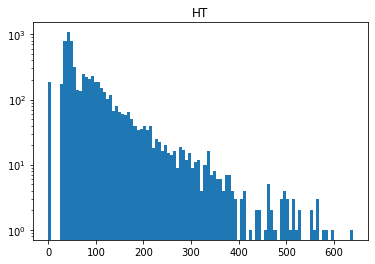

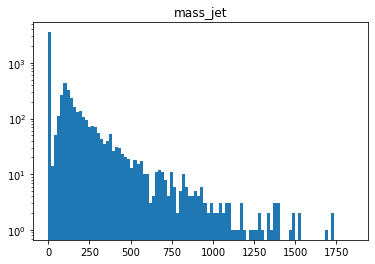

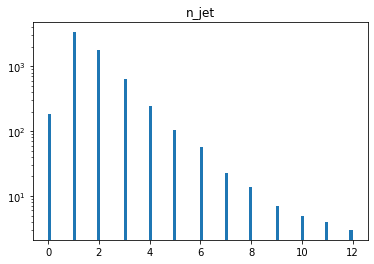

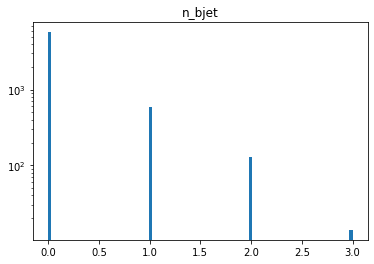

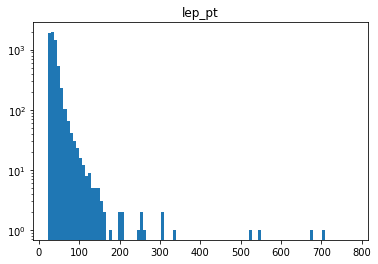

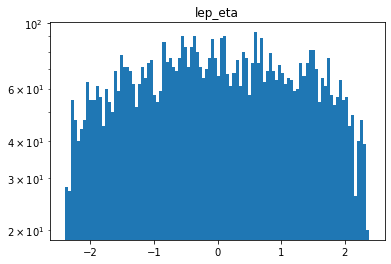

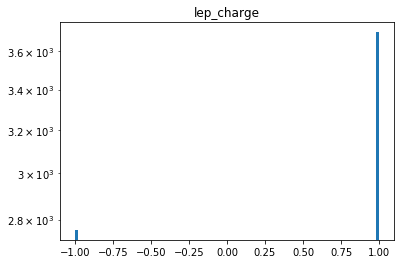

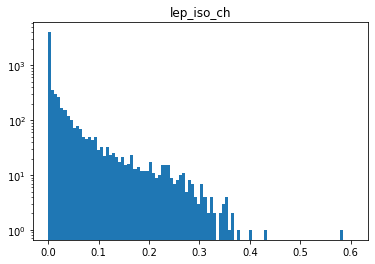

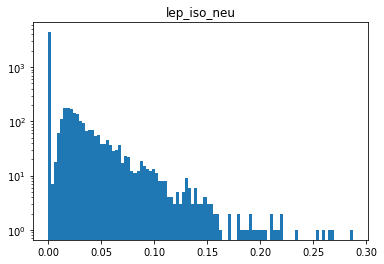

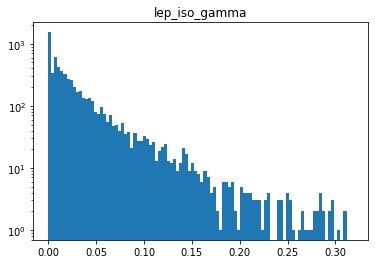

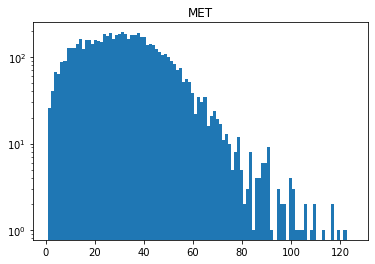

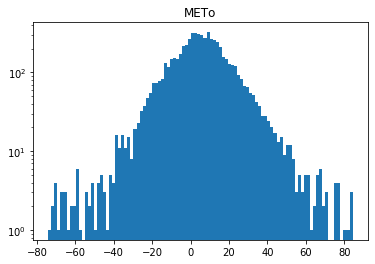

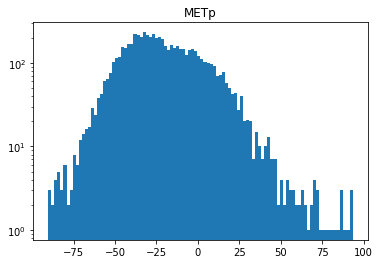

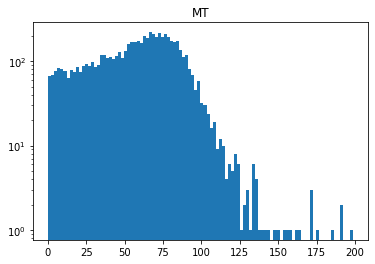

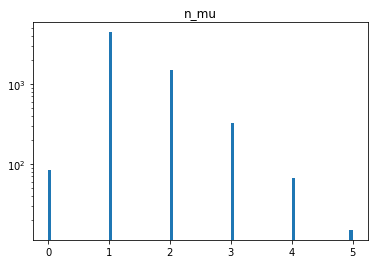

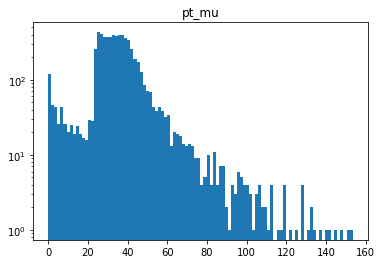

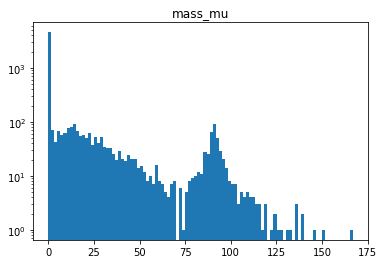

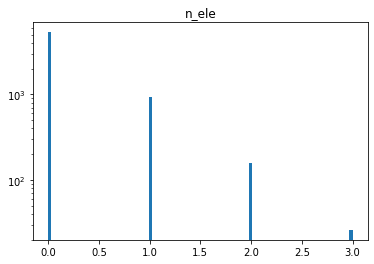

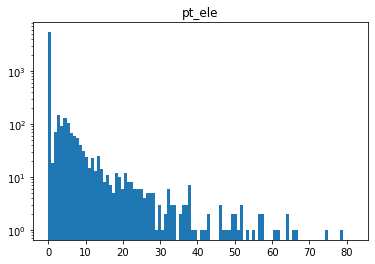

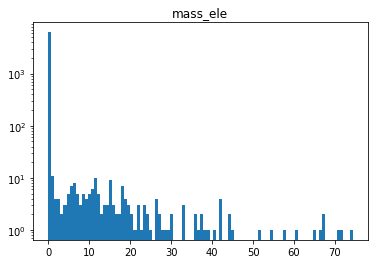

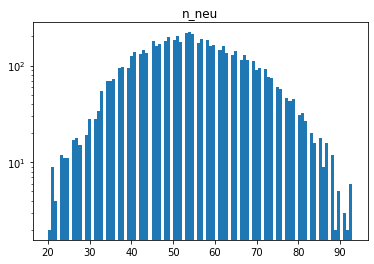

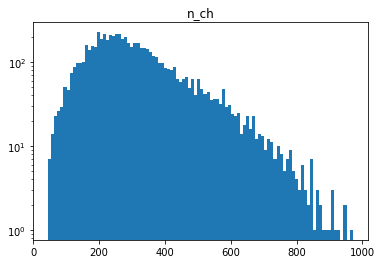

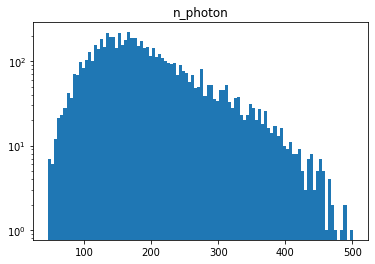

In [15]:
for i, name in enumerate(names):
    plt.figure()
    range = (np.quantile(data[:,i],0.001),np.quantile(data[:,i],0.999))
    plt.hist(data[:,i], bins=100,range=range)
    plt.title(name)
    plt.yscale('log', nonposy='clip')
plt.show()